IMPORTING THE NECESSARY LIBRARIES AND MODULES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor


IMPORTING THE DATASET 

In [2]:
df = pd.read_csv("/Users/harshavinaykotni/Desktop/internship/Instagram data.csv", encoding = 'latin1')
print(df.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

CHECKING FOR NULL DATA

In [3]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

DATA EXPLORATION

In [4]:
df.info() #insights of the columns to understand the data type of all the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [5]:
df.columns

Index(['Impressions', 'From Home', 'From Hashtags', 'From Explore',
       'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits',
       'Follows', 'Caption', 'Hashtags'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of      Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0           3920       2586           1028           619          56     98   
1           5394       2727           1838          1174          78    194   
2           4021       2085           1188             0         533     41   
3           4528       2700            621           932          73    172   
4           2518       1704            255           279          37     96   
..           ...        ...            ...           ...         ...    ...   
114        13700       5185           3041          5352          77    573   
115         5731       1923           1368          2266          65    135   
116         4139       1133           1538          1367          33     36   
117        32695      11815           3147         17414         170   1095   
118        36919      13473           4176         16444        2547    653   

     Comments  Sh

Analyzing Instagram Reach


In [7]:
df['engagement_rate_impression'] = ((df['Likes'] + df['Comments'] + df["Shares"]) / df['Impressions']) * 100
df.sample(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags,engagement_rate_impression
47,2826,2108,583,76,34,67,3,3,114,30,4,Visualizing data is one of the most valuable s...,#dataanalytics #datascience #data #machinelear...,4.246285
45,4298,3050,969,181,64,263,6,19,225,21,4,Here are some of the best Python project ideas...,#python #pythonprogramming #pythonprojects #py...,5.816659
35,2523,1659,796,29,21,34,6,0,86,4,2,Tokenization is the first step you should perf...,#data #datascience #dataanalysis #dataanalytic...,3.646453


PLOTTING THE REACH FROM HOME

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


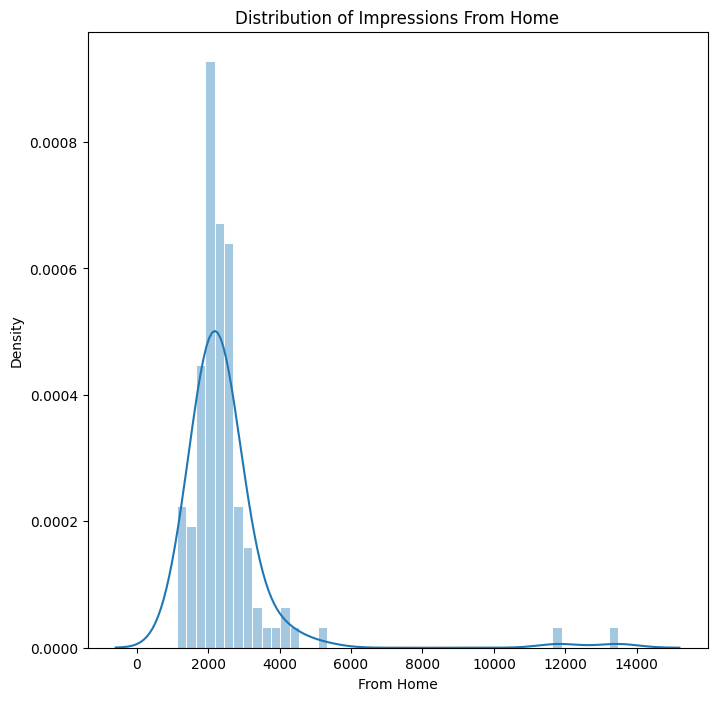

In [8]:
plt.figure(figsize=(8, 8))
plt.title("Distribution of Impressions From Home")
sns.histplot(df['From Home'],kde=True,stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, 1))
plt.show()

PLOTTING THE REACH FROM HASHTAGS

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


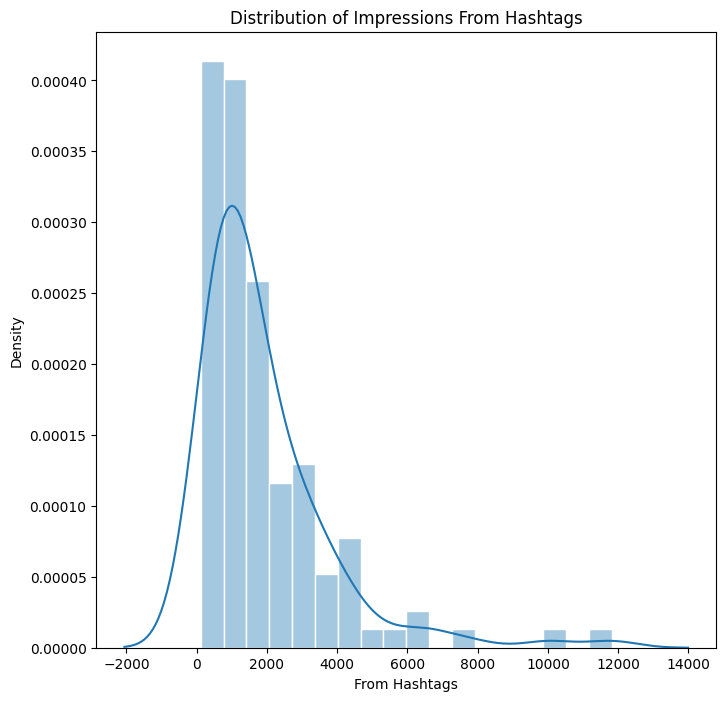

In [9]:
plt.figure(figsize=(8, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.histplot(df['From Hashtags'],kde=True,stat="density", kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, 1))
plt.show()

PLOTTING THE REACH FROM EXPLORE

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


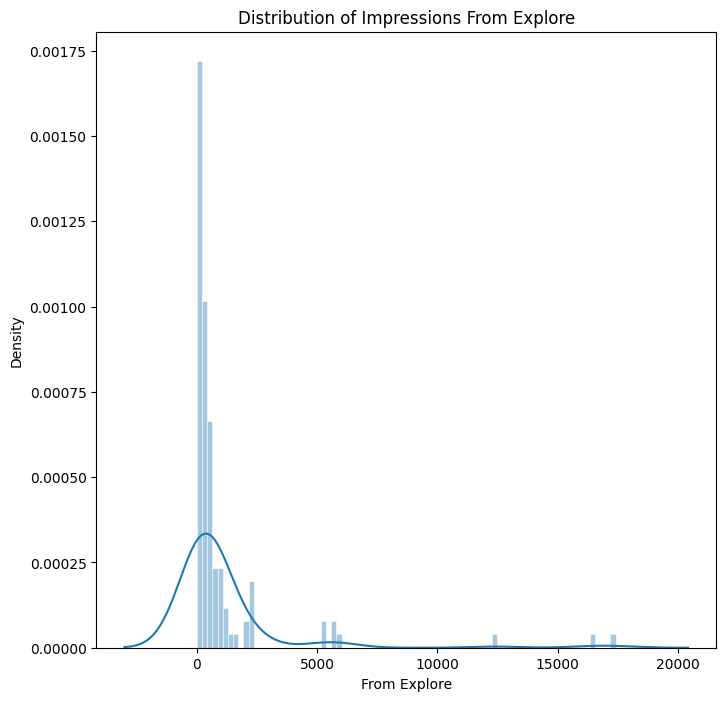

In [10]:
plt.figure(figsize=(8, 8))
plt.title("Distribution of Impressions From Explore")
sns.histplot(df['From Explore'],kde=True,stat="density" , kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, 1))
plt.show()


REACH AND AVERAGE REACH FROM DIFFERENT SOURCES

In [11]:
x = df[['From Home', 'From Hashtags', 'From Explore', 'From Other']]
px.bar(x, title = 'Plotting the Reach from Different Sources').show()
px.bar(x.mean(), color=x.columns, title = 'Plotting the Average Reach from Different Sources')

CORRELATION AMONG THE DATASET

In [12]:
df.select_dtypes('number').corr()


,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,engagement_rate_impression
Impressions,1.000000,0.844698,0.560760,0.893607,0.592960,0.779231,-0.028524,0.634675,0.849835,0.760981,0.889363,-0.537958
From Home,0.844698,1.000000,0.177516,0.800573,0.555666,0.768817,0.012716,0.674985,0.698330,0.531076,0.672675,-0.238001
From Hashtags,0.560760,0.177516,1.000000,0.190453,0.229623,0.305929,0.161439,0.219511,0.662124,0.691345,0.555485,-0.438169
From Explore,0.893607,0.800573,0.190453,1.000000,0.495685,0.747803,-0.158565,0.615731,0.653699,0.531850,0.796019,-0.492346
From Other,0.592960,0.555666,0.229623,0.495685,1.000000,0.331907,-0.108703,0.156834,0.393510,0.633080,0.546737,-0.360889
Saves,0.779231,0.768817,0.305929,0.747803,0.331907,1.000000,-0.026912,0.860324,0.845643,0.360628,0.628461,-0.181713
Comments,-0.028524,0.012716,0.161439,-0.158565,-0.108703,-0.026912,1.000000,0.016933,0.123586,0.096714,-0.060631,0.252776
Shares,0.634675,0.674985,0.219511,0.615731,0.156834,0.860324,0.016933,1.000000,0.707794,0.245361,0.493070,-0.040092
Likes,0.849835,0.698330,0.662124,0.653699,0.393510,0.845643,0.123586,0.707794,1.000000,0.626107,0.746333,-0.208972
Profile Visits,0.760981,0.531076,0.691345,0.531850,0.633080,0.360628,0.096714,0.245361,0.626107,1.000000,0.853152,-0.483779


RELATION BETWEEN LIKES AND IMPRESSIONS

In [13]:
figure = px.scatter(data_frame = df, x="Impressions",y="Likes", size="Likes", trendline="lowess", title = "Relationship Between Likes and Impressions")
figure.show()

RELATIONSHIP BETWEEN COMMENTS AND IMPRESSIONS

In [14]:
figure = px.scatter(data_frame = df, x="Impressions",y="Comments", size="Comments", trendline="ols", title = "Relationship Between Comments and Impressions")
figure.show()


RELATIONSHIP BETWEEN SHARES AND IMPRESSIONS

In [15]:
figure = px.scatter(data_frame = df, x="Impressions",y="Shares", size="Shares", trendline="ols", title = "Relationship Between Shares and Impressions")
figure.show()


RELATIONSHIP BETWEEN POST SAVES AND IMPRESSIONS

In [16]:
figure = px.scatter(data_frame = df, x="Impressions",y="Saves", size="Saves", trendline="ols", title = "Relationship Between Saves and Impressions")
figure.show()


In [17]:
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
print(correlation["Impressions"].sort_values(ascending=False))


Impressions                   1.000000
From Explore                  0.893607
Follows                       0.889363
Likes                         0.849835
From Home                     0.844698
Saves                         0.779231
Profile Visits                0.760981
Shares                        0.634675
From Other                    0.592960
From Hashtags                 0.560760
Comments                     -0.028524
engagement_rate_impression   -0.537958
Name: Impressions, dtype: float64


In [18]:
plt.figure(figsize=(20, 5))
px.imshow(df.select_dtypes('number').corr(), text_auto=True, aspect='pastel')


<Figure size 2000x500 with 0 Axes>

In [19]:
X = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
model = PassiveAggressiveRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9226027622358374

In [25]:
features = np.array([[285.0, 133.0, 3.0, 6.0, 160.0, 54.0]])
model.predict(features)


array([11499.27576557])